In [329]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


## step 1:   Data collection & preprocessing of data

In [330]:
df=pd.read_csv("D:\Projects\ML\Super_Store_data.csv",encoding='latin1')

In [331]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [333]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [334]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [335]:
df.duplicated().sum()

np.int64(0)

## Now we will remove the columns that are not necessary for future sales prediction


we are going to prepare a model that will predict the future so that we need only "Order data" and "Sales" on that particular date 
that's why  we remove all other columns from the data set

In [336]:
df=df.drop(['Row ID', 'Order ID', 'Ship Date', 'Ship Mode','Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category','Sub-Category','Product Name','Discount', 'Profit','Quantity'],axis=1)

In [337]:
df

,Order Date,Sales
0,11/8/2016,261.9600
1,11/8/2016,731.9400
2,10/11/2015,957.5775
3,6/9/2014,48.8600
4,6/9/2014,1706.1840
...,...,...
2116,3/19/2015,383.4656
2117,12/5/2016,13.4000
2118,9/6/2015,85.9800
2119,1/21/2014,25.2480


In [338]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [339]:
df.head()

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
2,2015-10-11,957.5775
3,2014-06-09,48.8600
4,2014-06-09,1706.1840


In [340]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  2121 non-null   datetime64[ns]
 1   Sales       2121 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 33.3 KB


## Now we need to convert the date into a monthly period and the same way the sales should be in monthly basis

In [341]:
df["Order Date"]=df["Order Date"].dt.to_period("M")
monthly_sale=df.groupby("Order Date").sum().reset_index()


In [342]:
monthly_sale["Order Date"]=monthly_sale["Order Date"].dt.to_timestamp()

In [343]:
monthly_sale.head()

,Order Date,Sales
0,2014-01-01,6242.525
1,2014-02-01,1839.658
2,2014-03-01,14573.956
3,2014-04-01,7944.837
4,2014-05-01,6912.787


visualization


In [344]:
monthly_sale.set_index('Order Date', inplace=True)

In [345]:
monthly_sale.head()

,Sales
Order Date,
2014-01-01,6242.525
2014-02-01,1839.658
2014-03-01,14573.956
2014-04-01,7944.837
2014-05-01,6912.787


## Step 2: Visualize the Data

<Axes: xlabel='Order Date'>

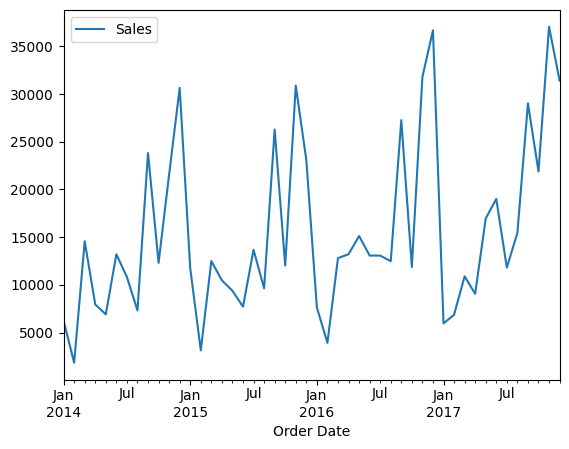

In [346]:
monthly_sale.plot()

In [347]:
monthly_sale.describe()

,Sales
count,48.000000
mean,15458.329069
std,9103.800668
min,1839.658000
25%,9297.702400
50%,12650.437500
75%,21644.671575
max,37056.715000


In [348]:
# pip install statsmodels

## Augmented Dickey–Fuller test


In [349]:
# Check for stationarity
from statsmodels.tsa.stattools import adfuller
adfuller_result = adfuller(monthly_sale)
print("ADF Statistic: %f" % adfuller_result[0])
print('p-value: %f' % adfuller_result[1])

ADF Statistic: -4.699026
p-value: 0.000085


The Augmented Dickey-Fuller (ADF) test statistic of -4.697056 with a p-value of 0.000085 suggests strong evidence against the null hypothesis (H0), leading to the rejection of the null hypothesis. This indicates that the data has no unit root and is stationary, implying that it does not exhibit a trend and its statistical properties remain constant over time.

## Autocorrelation graph

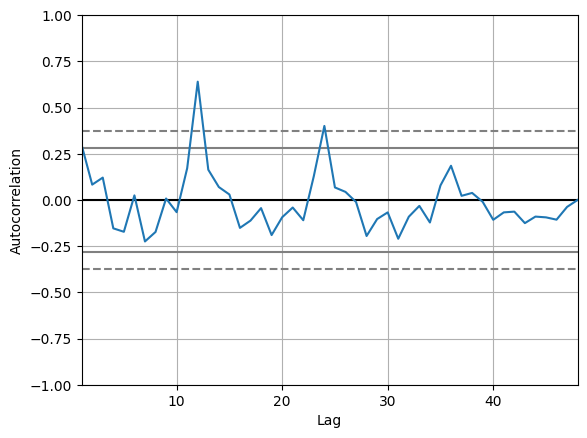

In [350]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(monthly_sale['Sales'])
plt.show()

## ACF & PACF

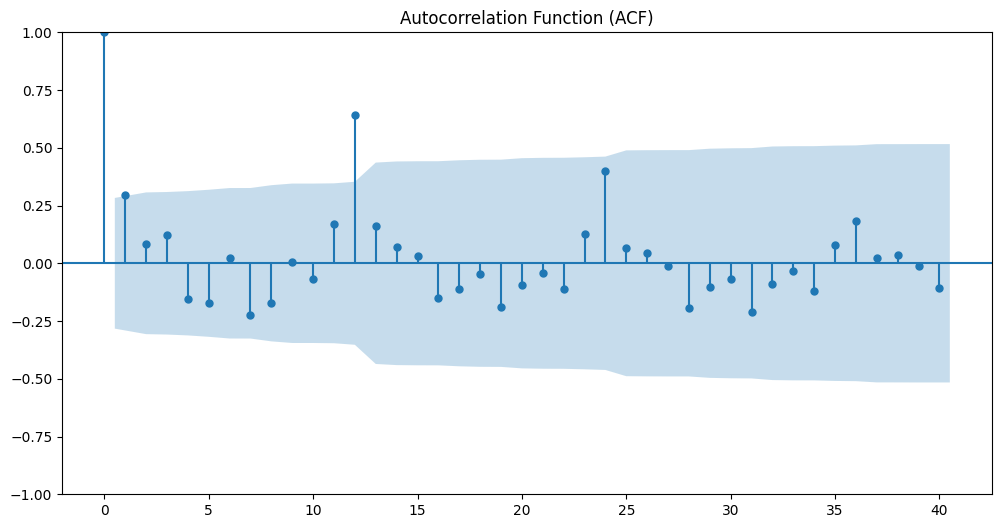

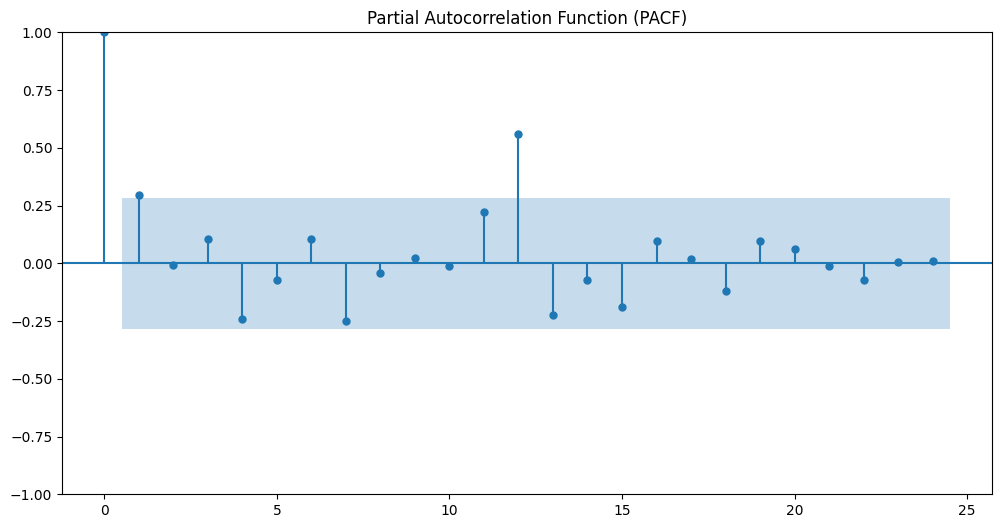

In [351]:
import statsmodels.api as sm

# Plot ACF
fig, ax1 = plt.subplots(figsize=(12, 6))
sm.graphics.tsa.plot_acf(monthly_sale['Sales'], lags=40, ax=ax1)
plt.title('Autocorrelation Function (ACF)')

# Plot PACF
fig, ax2 = plt.subplots(figsize=(12, 6))
sm.graphics.tsa.plot_pacf(monthly_sale['Sales'], lags=24, ax=ax2)
plt.title('Partial Autocorrelation Function (PACF)')

plt.show()

## Model building

## Split data into train and test sets


In [352]:
X = np.arange(len(monthly_sale)).reshape(-1, 1)
y = monthly_sale.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [353]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit ARIMA model
arima_model = ARIMA(y_train, order=(5,1,0))
arima_model_fit = arima_model.fit()

# Fit SARIMA model
sarima_model = SARIMAX(y_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_model_fit = sarima_model.fit()


# model=sm.tsa.statespace.SARIMAX(monthly_sale['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
# results=model.fit()

D:\Projects\ML\my-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [354]:
# arima_model_fit.summary()

In [355]:
# sarima_model_fit.summary()

## forcasting

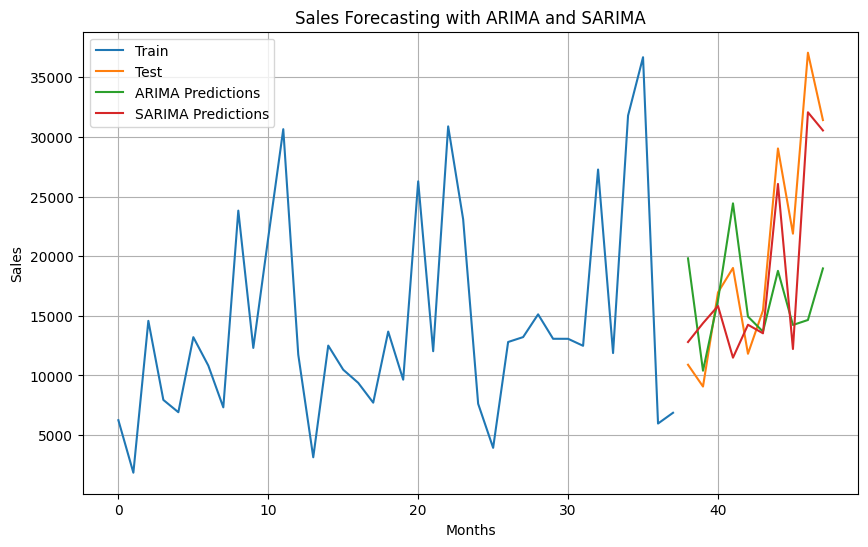

In [356]:
arima_predictions = arima_model_fit.forecast(steps=len(X_test))
sarima_predictions = sarima_model_fit.forecast(steps=len(X_test))
# Plot predictions
plt.figure(figsize=(10, 6))
plt.plot(X_train, y_train, label='Train')
plt.plot(X_test, y_test, label='Test')
plt.plot(X_test, arima_predictions, label='ARIMA Predictions')
plt.plot(X_test, sarima_predictions, label='SARIMA Predictions')
plt.title('Sales Forecasting with ARIMA and SARIMA')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


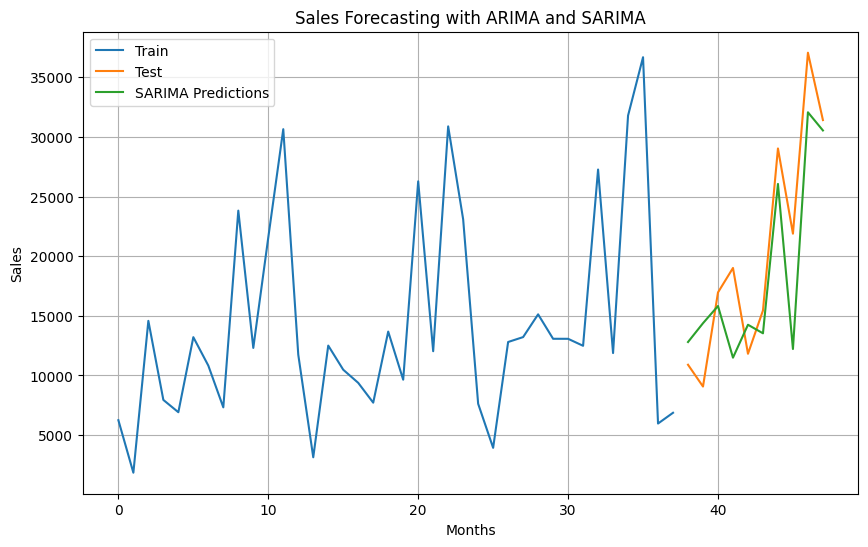

In [357]:
sarima_predictions = sarima_model_fit.forecast(steps=len(X_test))
# Plot predictions
plt.figure(figsize=(10, 6))
plt.plot(X_train, y_train, label='Train')
plt.plot(X_test, y_test, label='Test')
plt.plot(X_test, sarima_predictions, label='SARIMA Predictions')
plt.title('Sales Forecasting with ARIMA and SARIMA')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


## Extend the data for future prediction

Creating new data for future prediction

In [358]:
extend_data = np.arange(len(monthly_sale),len(monthly_sale)+36).reshape(-1, 1)
extend_data.shape

(36, 1)

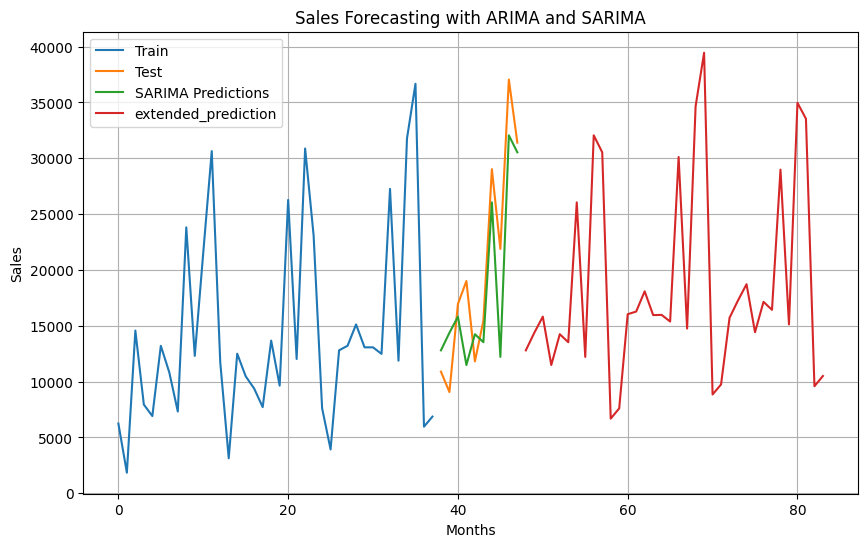

In [359]:
sarima_predictions = sarima_model_fit.forecast(steps=len(X_test))
extended_prediction = sarima_model_fit.forecast(steps=len(extend_data))
# Plot predictions
plt.figure(figsize=(10, 6))
plt.plot(X_train, y_train, label='Train')
# plt.plot(X_train, y_train, label='Train')
plt.plot(X_test, y_test, label='Test')
plt.plot(X_test, sarima_predictions, label='SARIMA Predictions')
plt.plot(extend_data, extended_prediction, label='extended_prediction')
plt.title('Sales Forecasting with ARIMA and SARIMA')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()